# Energy generation for ID 11

In [16]:
#Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [17]:
data = pd.read_csv("https://raw.githubusercontent.com/stardustd/Predict-energy-consumption/master/dataset/2012_2013_merged_customerID_11.csv",
               parse_dates=["date"],
               index_col="date")
data.head()

,temperature,apparentTemperature,precipIntensity,precipProbability,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,uvIndex,cloudCover,visibility,GC,GG
date,,,,,,,,,,,,,,,
2012-07-01 00:00:00,10.77,10.77,0.0,0.0,5.48,0.70,1014.8,0.75,0.75,294,0,0.78,9.988,0.353,0.0
2012-07-01 00:30:00,10.77,10.77,0.0,0.0,5.48,0.70,1014.8,0.75,0.75,294,0,0.78,9.988,0.567,0.0
2012-07-01 01:00:00,10.21,10.21,0.0,0.0,5.52,0.73,0.0,0.21,0.61,289,0,1.00,0.000,0.547,0.0
2012-07-01 01:30:00,10.21,10.21,0.0,0.0,5.52,0.73,0.0,0.21,0.61,289,0,1.00,0.000,0.613,0.0
2012-07-01 02:00:00,9.48,9.48,0.0,0.0,5.22,0.75,0.0,0.33,0.95,284,0,0.88,0.000,0.519,0.0


In [18]:
data.shape

(17520, 15)

In [19]:
data["uvIndex"].value_counts()

0     11304
1      1300
2      1152
3       924
4       688
6       668
5       666
7       336
8       220
9       106
10       90
11       46
12       20
Name: uvIndex, dtype: int64

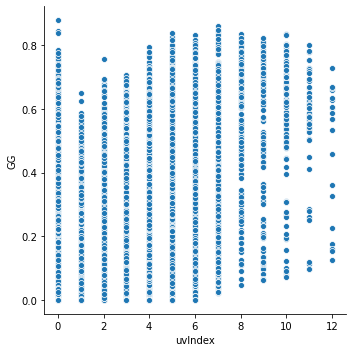

In [20]:
sns.relplot(x= "uvIndex", y= "GG", data=data)

In [13]:
# Basic statistics :

data.describe()

,temperature,apparentTemperature,precipIntensity,precipProbability,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,uvIndex,cloudCover,visibility,GC,GG
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,18.237660,18.263350,0.148876,0.090576,10.632348,0.633195,693.214041,3.031832,3.982727,187.312443,1.322945,0.410481,9.159691,0.378977,0.135781
std,5.169219,5.420304,0.746871,0.209571,4.487578,0.154054,474.060931,1.828670,2.662988,105.758347,2.289643,0.329263,2.645891,0.322034,0.217528
min,5.450000,2.990000,0.000000,0.000000,-4.400000,0.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.370000,14.370000,0.000000,0.000000,7.737500,0.530000,0.000000,1.570000,1.997500,93.000000,0.000000,0.040000,9.988000,0.146000,0.000000
50%,18.290000,18.310000,0.000000,0.000000,10.870000,0.630000,1013.500000,2.750000,3.540000,191.000000,0.000000,0.400000,10.003000,0.245000,0.000000
75%,21.710000,21.760000,0.021300,0.060000,13.620000,0.720000,1019.500000,4.230000,5.320000,283.000000,2.000000,0.750000,10.003000,0.523000,0.206000
max,45.000000,45.670000,31.415000,1.000000,23.850000,0.960000,1033.500000,11.490000,20.720000,359.000000,12.000000,1.000000,16.093000,3.042000,0.879000


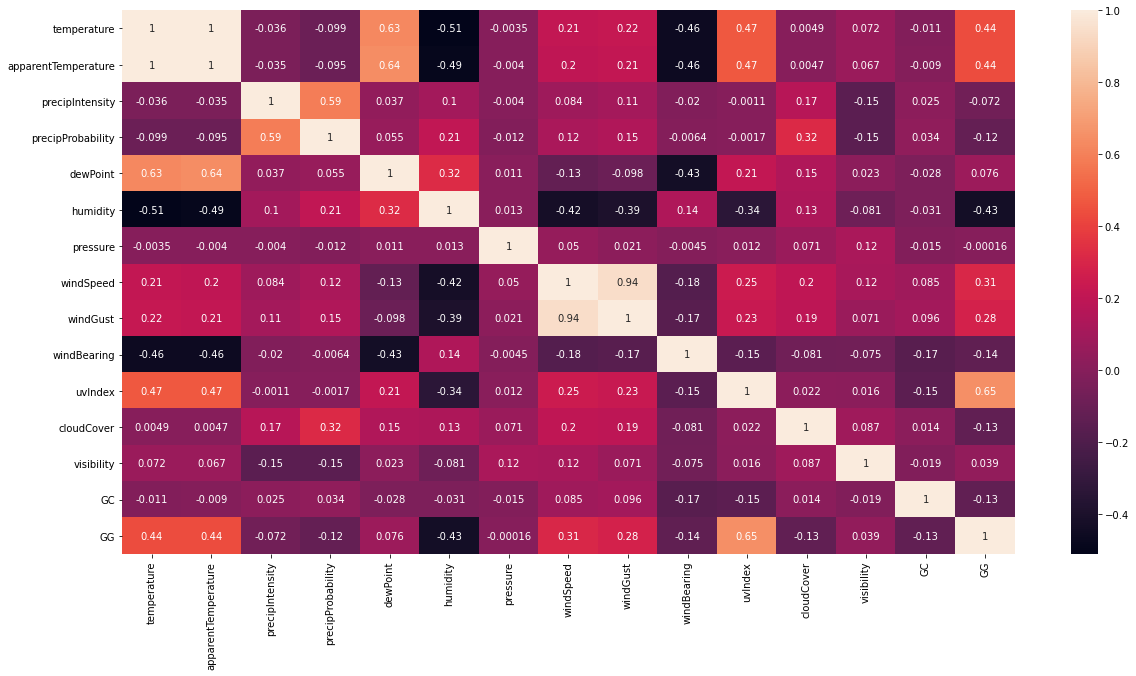

In [14]:
# Checking futures correlation

c = data.corr()

plt.subplots(figsize=(20,10))
sns.heatmap(c, annot=True)

In [15]:
c = data.corr()
abs(c['GC']).sort_values(ascending = False)

GC                     1.000000
windBearing            0.165555
uvIndex                0.147406
GG                     0.133866
windGust               0.096441
windSpeed              0.085491
precipProbability      0.033737
humidity               0.031266
dewPoint               0.027656
precipIntensity        0.024935
visibility             0.018991
pressure               0.014880
cloudCover             0.013899
temperature            0.010628
apparentTemperature    0.008980
Name: GC, dtype: float64

In [85]:
100 * data.isnull().sum() / data.shape[0]

temperature            0.0
apparentTemperature    0.0
precipIntensity        0.0
precipProbability      0.0
dewPoint               0.0
humidity               0.0
pressure               0.0
windSpeed              0.0
windGust               0.0
windBearing            0.0
uvIndex                0.0
cloudCover             0.0
visibility             0.0
GC                     0.0
GG                     0.0
dtype: float64

In [86]:

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

figure = go.Scatter(x=data.index,
                    y=data.GG,
                    name = "Evolution de la conso par mois",
                    line = dict(color = 'blue'),
                    opacity = 0.5)

layout = dict(title='Evolution de la conso par mois',)

fig = dict(data=[figure], layout=layout)
iplot(fig)

In [87]:
july_data_2012 = data["2012-07"]
july_data_2012.head(10)

,temperature,apparentTemperature,precipIntensity,precipProbability,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,uvIndex,cloudCover,visibility,GC,GG
date,,,,,,,,,,,,,,,
2012-07-01 00:00:00,10.77,10.77,0.0,0.0,5.48,0.70,1014.8,0.75,0.75,294,0,0.78,9.988,0.353,0.0
2012-07-01 00:30:00,10.77,10.77,0.0,0.0,5.48,0.70,1014.8,0.75,0.75,294,0,0.78,9.988,0.567,0.0
2012-07-01 01:00:00,10.21,10.21,0.0,0.0,5.52,0.73,0.0,0.21,0.61,289,0,1.00,0.000,0.547,0.0
2012-07-01 01:30:00,10.21,10.21,0.0,0.0,5.52,0.73,0.0,0.21,0.61,289,0,1.00,0.000,0.613,0.0
2012-07-01 02:00:00,9.48,9.48,0.0,0.0,5.22,0.75,0.0,0.33,0.95,284,0,0.88,0.000,0.519,0.0
2012-07-01 02:30:00,9.48,9.48,0.0,0.0,5.22,0.75,0.0,0.33,0.95,284,0,0.88,0.000,0.314,0.0
2012-07-01 03:00:00,10.30,10.30,0.0,0.0,5.19,0.71,1014.6,1.20,1.43,318,0,0.77,9.988,0.324,0.0
2012-07-01 03:30:00,10.30,10.30,0.0,0.0,5.19,0.71,1014.6,1.20,1.43,318,0,0.77,9.988,0.301,0.0
2012-07-01 04:00:00,10.47,10.47,0.0,0.0,5.16,0.70,1014.8,1.35,1.99,320,0,1.00,9.988,0.343,0.0


In [88]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

figure = go.Scatter(x=july_data_2012.index,
                    y=july_data_2012.GG,
                    name = "Evolution de la production par mois",
                    line = dict(color = 'blue'),
                    opacity = 0.5)

layout = dict(title='Evolution de la production par mois',)

fig = dict(data=[figure], layout=layout)
iplot(fig)

In [89]:
fig = go.Figure([{
    'x': july_data_2012.index,
    'y': july_data_2012.GC,
    'name': col
}  for col in july_data_2012])

fig.show()

In [3]:
# Separate target variable Y from features X
data = data.drop('GC', axis = 1)
data

target_name = 'GG'


Y = data[target_name]
X = data.drop(target_name, axis=1)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
# Data normalization

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns = X_train.columns, index= X_train.index)
display(X_train)

#sc_x.fit(X_train)
#X_train= sc_x.transform(X_train)

print("-------------")
X_test = pd.DataFrame(sc_x.transform(X_test), columns = X_test.columns, index=X_test.index)
display(X_test)

,temperature,apparentTemperature,precipIntensity,precipProbability,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,uvIndex,cloudCover,visibility
date,,,,,,,,,,,,,
2013-05-23 08:30:00,-0.913169,-0.875892,-0.000921,2.042538,0.343114,1.860126,-1.460075,-0.463098,-0.375285,-0.275874,-0.578595,1.037455,0.319476
2013-02-06 09:00:00,1.402510,1.332067,-0.196739,-0.433049,0.954784,-0.734863,0.692209,-0.163298,-0.147461,-1.314303,2.025083,-0.025883,0.319476
2013-06-10 17:00:00,-0.464663,-0.448249,0.190576,3.565976,0.752377,1.665502,-1.460075,-1.079052,-1.043818,0.753114,-0.578595,1.037455,0.319476
2012-10-14 01:00:00,-1.071013,-1.026393,-0.196739,-0.433049,-0.515448,0.757256,-1.460075,-1.013641,-0.999000,0.838077,-0.578595,-1.241127,-3.449369
2012-08-15 11:00:00,0.149387,0.137236,-0.196739,-0.433049,-1.580865,-1.772858,-1.460075,0.452655,0.043015,1.225127,1.157190,-1.241127,-3.449369
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-04-23 10:00:00,0.284131,0.265712,-0.196739,-0.433049,-0.395338,-0.864612,0.675554,-0.043378,0.140120,0.800315,0.723244,-1.241127,0.313824
2013-02-15 16:00:00,1.100298,1.043912,-0.041165,-0.052190,0.863589,-0.475364,0.690944,1.144922,0.849736,-0.747888,-0.144649,-0.360075,0.186475
2012-07-25 13:30:00,0.043516,0.036290,-0.182289,-0.004582,-0.635558,-0.864612,0.691576,0.256422,-0.181075,1.451694,0.723244,-0.724648,0.319476


-------------


,temperature,apparentTemperature,precipIntensity,precipProbability,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,uvIndex,cloudCover,visibility
date,,,,,,,,,,,,,
2012-07-29 01:00:00,-1.586891,-1.518274,-0.196739,-0.433049,-1.549726,0.108509,0.690101,0.141953,-0.218423,0.866397,-0.578595,-1.241127,0.313824
2013-04-25 02:00:00,-0.865046,-0.830008,-0.196739,-0.433049,-0.390890,0.562632,-1.460075,-0.811957,-0.759972,0.687032,-0.578595,-0.663886,0.319476
2013-01-01 17:00:00,1.273540,1.262322,0.298749,0.281063,1.704357,0.238258,-1.460075,-0.108789,-0.237097,-1.163259,-0.578595,-0.663886,0.319476
2013-03-27 06:00:00,0.646016,0.709874,0.519956,-0.147404,2.009080,1.665502,-1.460075,-1.089954,-0.909364,1.253448,-0.578595,-1.241127,-3.449369
2013-01-23 17:30:00,0.715313,0.676837,-0.196739,-0.433049,0.251920,-0.734863,-1.460075,1.292097,0.995394,0.016774,-0.578595,1.037455,0.319476
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-06-09 11:30:00,-0.062354,-0.064656,-0.089917,0.328670,0.131810,0.108509,-1.460075,-1.068150,-1.088636,1.366731,0.289298,-0.025883,0.319476
2013-04-28 11:30:00,1.489131,1.414659,-0.071010,-0.147404,0.025046,-1.643108,-1.460075,-0.332276,-0.266975,1.262888,1.157190,-1.241127,0.313824
2012-08-14 04:00:00,-2.129719,-2.035851,-0.196739,-0.433049,-1.202742,1.535752,0.693052,-1.269834,-1.193211,1.395052,-0.578595,-1.241127,0.313824


## Stat Model (moindres carrés)

In [6]:
import statsmodels.api as sm

model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GG   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     1193.
Date:                Wed, 26 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:12:23   Log-Likelihood:                 6638.2
No. Observations:               14016   AIC:                        -1.325e+04
Df Residuals:                   14002   BIC:                        -1.314e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1365      0.001    107.178      0.000       0.134       0.139
temperature            -0.0760      0.019     -4.050      0.000      -0.113      -0.039
apparentTemperature     0.2003      0.018     11.168      0.000       0.165       0.235
precipIntensity        -0.0035      0.002     -2.215      0.027      -0.007      -0.000
precipProbability      -0.0141      0.002     -8.395      0.000      -0.017      -0.011
dewPoint               -0.0992      0.007    -14.847      0.000      -0.112      -0.086
humidity                0.0577      0.006      9.594      0.000       0.046       0.070
pressure               -0.0015      0.001     -1.126      0.260      -0.004       0.001
windSpeed               0.0507      0.004     12.859      0.000       0.043       0.058
windGust               -0.0178      0.004     -4.641      0.000      -0.025      -0.010
windBearing            -0.0024      0.002     -1.561      0.119      -0.005       0.001
uvIndex                 0.1169      0.001     78.531      0.000       0.114       0.120
cloudCover             -0.0269      0.001    -18.925      0.000      -0.030      -0.024
visibility              0.0005      0.001      0.393      0.694      -0.002       0.003
==============================================================================
Omnibus:                     1187.955   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2327.837
Skew:                           0.577   Prob(JB):                         0.00
Kurtosis:                       4.630   Cond. No.                         37.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
model = sm.OLS(Y_test, sm.add_constant(X_test)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GG   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     270.7
Date:                Wed, 26 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:12:42   Log-Likelihood:                 1676.6
No. Observations:                3504   AIC:                            -3325.
Df Residuals:                    3490   BIC:                            -3239.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1367      0.003     53.705      0.000       0.132       0.142
temperature            -0.1904      0.038     -5.039      0.000      -0.265      -0.116
apparentTemperature     0.2982      0.036      8.356      0.000       0.228       0.368
precipIntensity        -0.0015      0.003     -0.463      0.644      -0.008       0.005
precipProbability      -0.0116      0.004     -3.232      0.001      -0.019      -0.005
dewPoint               -0.0842      0.013     -6.275      0.000      -0.111      -0.058
humidity                0.0394      0.012      3.251      0.001       0.016       0.063
pressure                0.0014      0.003      0.556      0.578      -0.004       0.007
windSpeed               0.0554      0.008      6.633      0.000       0.039       0.072
windGust               -0.0276      0.008     -3.355      0.001      -0.044      -0.011
windBearing            -0.0005      0.003     -0.143      0.886      -0.007       0.006
uvIndex                 0.1140      0.003     37.605      0.000       0.108       0.120
cloudCover             -0.0275      0.003     -9.776      0.000      -0.033      -0.022
visibility              0.0014      0.003      0.509      0.610      -0.004       0.007
==============================================================================
Omnibus:                      391.898   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.879
Skew:                           0.749   Prob(JB):                    6.40e-153
Kurtosis:                       4.598   Cond. No.                         37.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## LinearRegression Model

In [8]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print(" ")

print("Train score : {}".format(regressor.score(X_train, Y_train)))
print(" ")
print("Test score : {}".format(regressor.score(X_test, Y_test)))

 
Train score : 0.5254755730949184
 
Test score : 0.49981473093184775


In [10]:
y_true = data["GG"]

In [11]:
y_pred = regressor.predict(X_test)
y_pred

array([0.09350693, 0.03719759, 0.08632979, ..., 0.02358659, 0.10748361,
       0.14924786])

In [12]:
from sklearn.metrics import r2_score

print("")
display(r2_score(Y_test, y_pred))
print("")

0.4998147309318478

On constate que 72% de la variance de la variable cible peut être expliquée par les variables explicatives(regresseurs). Les 28% restants peuvent être attribués à des variables inconnues et cachées ou à une variabilité inhérente. C'est-à-dire que 72% des prédictions du modèle (de régression) correspondent parfaitement aux données réelles $(R^2 = 0.72)$.

In [13]:
from sklearn.metrics import explained_variance_score
print(" ")
display(explained_variance_score(Y_test, y_pred))
print(" ")

0.49981641168545066

 Ici, on peut dire que 72% de la variabilité de la variable dépendante (GG) a été prise en compte et que les 28% restants de la variabilité sont toujours non pris en compte par le modèle $(R^2 = 0.72)$.

In [14]:
from sklearn.metrics import mean_squared_error
print(" ")
display(mean_squared_error(Y_test, y_pred))
print("")

0.02259080314020383

 Ici, on voit bien que le modèle prédit les observations (GG) avec une précision relativement parfaite $(MSE = 0.0056)$.

In [15]:
from sklearn.metrics import mean_absolute_error
print(" ")
display(mean_absolute_error(Y_test, y_pred))

print(" ")
# display(mean_absolute_error(Y_test, y_pred, multioutput=[0.3, 0.7]))

0.10671244601126377

In [16]:
from sklearn.metrics import max_error
print("")
display(max_error(Y_test, y_pred))
print("")

0.6603968221685812

In [56]:
regressor.coef_

array([ 0.20881114, -0.00204004, -0.00367411,  0.00380246, -0.14431592,
        0.13867353, -0.00066813,  0.04828083, -0.02855604,  0.01805268,
        0.09129099, -0.02159322,  0.00091912])

In [17]:
coefs = pd.DataFrame(index=data.columns[:-1], data = regressor.coef_.transpose(), columns=["coefficients"])
coefs

,coefficients
temperature,-0.075995
apparentTemperature,0.200333
precipIntensity,-0.003466
precipProbability,-0.014142
dewPoint,-0.099169
humidity,0.057731
pressure,-0.001451
windSpeed,0.050655
windGust,-0.017779
windBearing,-0.002428


In [18]:
coefs.sort_values(by="coefficients", ascending=False)

,coefficients
apparentTemperature,0.200333
uvIndex,0.116880
humidity,0.057731
windSpeed,0.050655
visibility,0.000524
pressure,-0.001451
windBearing,-0.002428
precipIntensity,-0.003466
precipProbability,-0.014142
windGust,-0.017779


In [19]:
from sklearn.feature_selection import f_regression

feature_importance = f_regression(X_train, Y_train)


feature_importance

(array([3.40694786e+03, 3.40078217e+03, 7.26556892e+01, 2.10454500e+02,
        9.30940779e+01, 3.26305569e+03, 6.64166951e-01, 1.51235260e+03,
        1.24404331e+03, 2.73263274e+02, 1.05239160e+04, 2.51005575e+02,
        1.58645720e+01]),
 array([0.00000000e+000, 0.00000000e+000, 1.69985293e-017, 2.40815890e-047,
        5.83565277e-022, 0.00000000e+000, 4.15106545e-001, 2.95938766e-314,
        3.60551000e-261, 8.29870939e-061, 0.00000000e+000, 4.80215051e-056,
        6.83844013e-005]))

In [20]:
feature_ranking = pd.DataFrame(columns=data.columns[:-1], data=feature_importance,
                               index=["f-score", "p-value"]).transpose().sort_values(["f-score", "p-value"], ascending=False)
feature_ranking

,f-score,p-value
uvIndex,10523.916022,0.000000e+00
temperature,3406.947862,0.000000e+00
apparentTemperature,3400.782171,0.000000e+00
humidity,3263.055685,0.000000e+00
windSpeed,1512.352595,2.959388e-314
windGust,1244.043309,3.605510e-261
windBearing,273.263274,8.298709e-61
cloudCover,251.005575,4.802151e-56
precipProbability,210.454500,2.408159e-47
dewPoint,93.094078,5.835653e-22


C:\Users\FLaude E. BANZA\anaconda3\lib\site-packages\seaborn\axisgrid.py:861: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


<Figure size 1440x576 with 0 Axes>

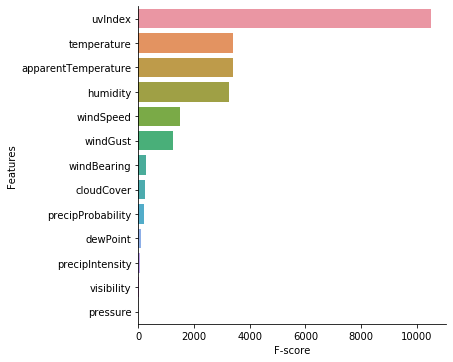

In [21]:
plt.figure(figsize = (20, 8))
ax = sns.catplot(x=feature_ranking.columns[0], y=[index for index in feature_ranking.index],
                 data=feature_ranking, kind="bar", legend=False)
ax.set(xlabel='F-score', ylabel='Features')
plt.show()

## RandomForest 

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [24]:
print(" ")

print("RF_train score : {}".format(rf_regressor.score(X_train, Y_train)))
print(" ")
print("RF_test score : {}".format(rf_regressor.score(X_test, Y_test)))

 
RF_train score : 0.9735272439886008
 
RF_test score : 0.8726019751576866


In [68]:
from sklearn.model_selection import GridSearchCV
rf_regressor_grid = RandomForestRegressor()
params = {"n_estimators": range(50, 100, 10),
          "max_depth" : range(10, 50),
          "max_features" : range(5, 13)
          }

regressor = GridSearchCV(cv=10, estimator = rf_regressor_grid, param_grid = params, n_jobs=-1, verbose=3).fit(X_train, Y_train)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | e

In [69]:
regressor.best_params_

{'max_depth': 25, 'max_features': 5, 'n_estimators': 70}

In [70]:
regressor.best_estimator_.score(X_train, Y_train)

0.9692985442525065

In [71]:
regressor.best_estimator_.score(X_test, Y_test)

0.8947609932619253

## XGboost Model

In [25]:
!pip install xgboost


In [30]:
from xgboost import XGBRegressor
regressor_xgb = XGBRegressor()
regressor_xgb.fit(X_train, Y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [31]:
regressor_xgb.score(X_train, Y_train)

0.9388620135532069

In [32]:
regressor_xgb.score(X_test, Y_test)

0.8385874537807049

In [33]:
from sklearn.metrics import r2_score

print("")
display(r2_score(Y_test, regressor_xgb.predict(X_test)))
print("")

0.8385874537807048

In [34]:
from sklearn.metrics import mean_squared_error
print(" ")
display(mean_squared_error(Y_test, regressor_xgb.predict(X_test)))
print("")

0.007290176823464807

In [35]:
from sklearn.metrics import mean_absolute_error
print(" ")
display(mean_absolute_error(Y_test, regressor_xgb.predict(X_test)))

0.05088436610139396